In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import torch
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop,Adagrad
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip /content/cnn_dataset.zip -d /content/cnn_dataset1

Streaming output truncated to the last 5000 lines.
  inflating: /content/cnn_dataset1/vehicles/5499.jpg  
  inflating: /content/cnn_dataset1/vehicles/55.jpg  
  inflating: /content/cnn_dataset1/vehicles/550.jpg  
  inflating: /content/cnn_dataset1/vehicles/5500.jpg  
  inflating: /content/cnn_dataset1/vehicles/5501.jpg  
  inflating: /content/cnn_dataset1/vehicles/5502.jpg  
  inflating: /content/cnn_dataset1/vehicles/5503.jpg  
  inflating: /content/cnn_dataset1/vehicles/5504.jpg  
  inflating: /content/cnn_dataset1/vehicles/5505.jpg  
  inflating: /content/cnn_dataset1/vehicles/5506.jpg  
  inflating: /content/cnn_dataset1/vehicles/5507.jpg  
  inflating: /content/cnn_dataset1/vehicles/5508.jpg  
  inflating: /content/cnn_dataset1/vehicles/5509.jpg  
  inflating: /content/cnn_dataset1/vehicles/551.jpg  
  inflating: /content/cnn_dataset1/vehicles/5510.jpg  
  inflating: /content/cnn_dataset1/vehicles/5511.jpg  
  inflating: /content/cnn_dataset1/vehicles/5512.jpg  
  inflating: /cont

In [2]:
dataset_folder = '/content/cnn_dataset1'

In [3]:
class_counts_sn = {}
total_samples_sn = 0
image_sizes_sn = []

# Iterating  through the images dataset folder
for category_sn in os.listdir(dataset_folder):
    category_path_sn = os.path.join(dataset_folder, category_sn)

    # Checking if we are in the directory
    if os.path.isdir(category_path_sn):
        class_counts_sn[category_sn] = 0 # count for total number of classes
        # Iterating through images in that particular class
        for image_file_sn in os.listdir(category_path_sn):
            image_path_sn = os.path.join(category_path_sn, image_file_sn)
            image_sn = cv2.imread(image_path_sn) #reading the image inside the file
            if image_sn is not None:
                class_counts_sn[category_sn] += 1
                height_sn, width_sn, _ = image_sn.shape
                #getting image dimensions and storing them
                image_sizes_sn.append((height_sn, width_sn))
                total_samples_sn += 1
# Printing the statistics of the dataset that we are working with
print("Number of classes:", len(class_counts_sn))
print("Total samples:", total_samples_sn)
print("\nClass distribution:")
for category_sn, count_sn in class_counts_sn.items():
    print(f"{category_sn}: {count_sn} samples")

image_sizes_sn = np.array(image_sizes_sn)
average_size_sn = np.mean(image_sizes_sn, axis=0)
min_size_sn = np.min(image_sizes_sn, axis=0)
max_size_sn = np.max(image_sizes_sn, axis=0)

print("\nImage size statistics:")
print("Average size:", average_size_sn)
print("Minimum size:", min_size_sn)
print("Maximum size:", max_size_sn)

Number of classes: 3
Total samples: 30000

Class distribution:
vehicles: 10000 samples
food: 10000 samples
dogs: 10000 samples

Image size statistics:
Average size: [64. 64.]
Minimum size: [64 64]
Maximum size: [64 64]


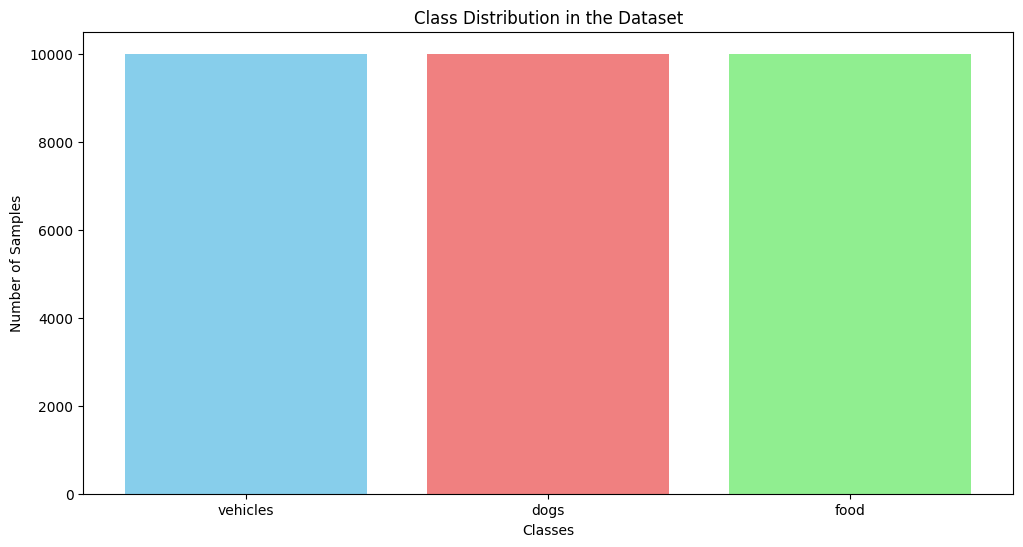

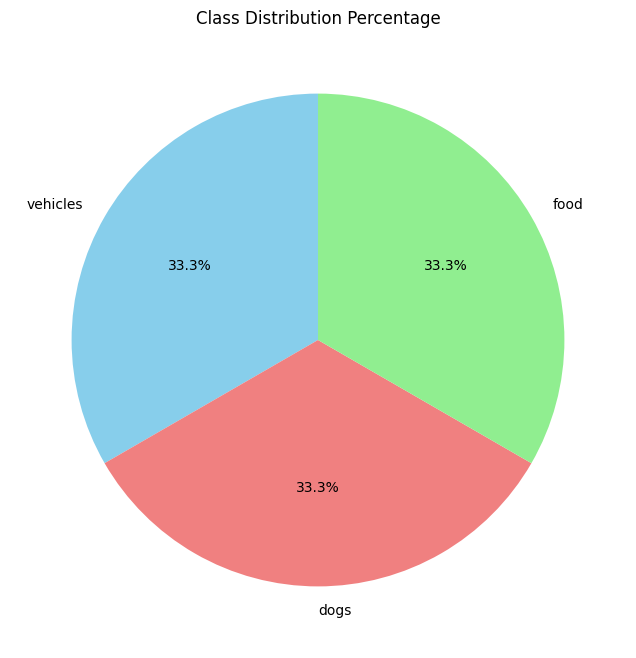

In [4]:
import matplotlib.pyplot as plt
import numpy as np

class_labels = ['vehicles', 'dogs', 'food']
class_samples = [10000, 10000, 10000]

# Visualization 1: Class Distribution Bar Chart with Different Colors
plt.figure(figsize=(12, 6))
colors = ['skyblue', 'lightcoral', 'lightgreen']
plt.bar(class_labels, class_samples, color=colors)
plt.title('Class Distribution in the Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()

image_sizes = np.random.randint(60, 70, size=(30000, 2))


# Visualization 2: Class Distribution Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(class_samples, labels=class_labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Class Distribution Percentage')
plt.show()


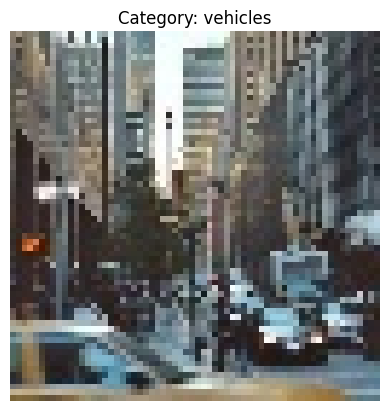

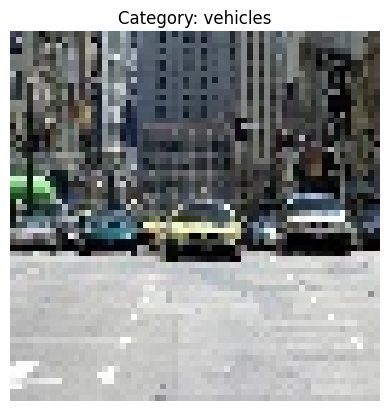

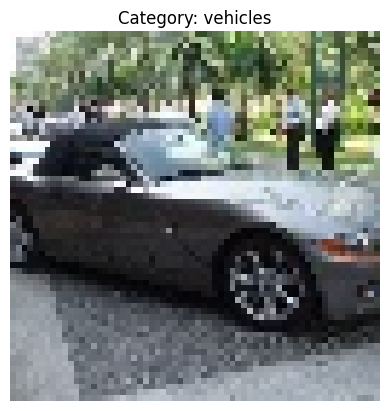

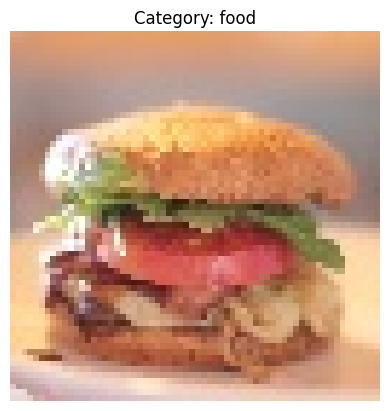

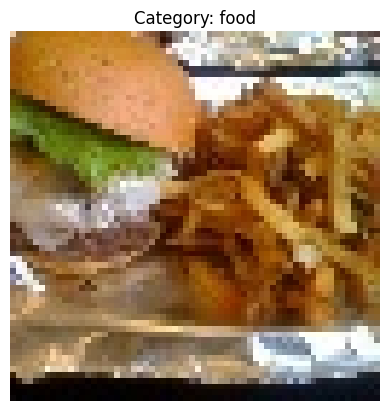

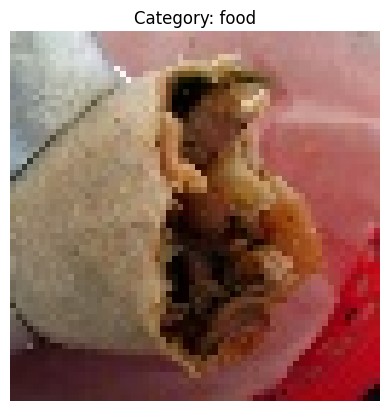

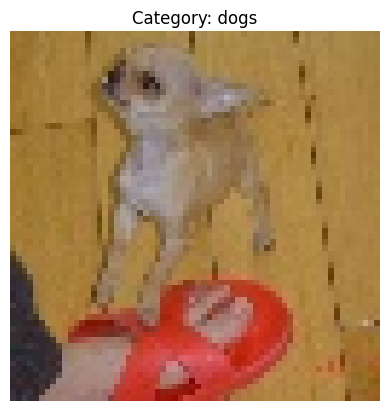

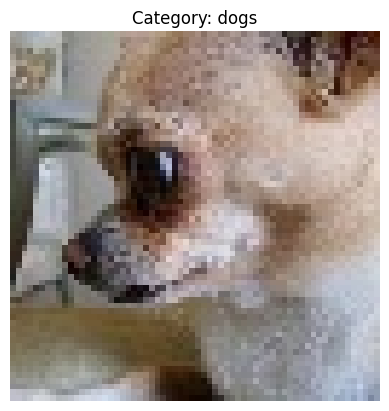

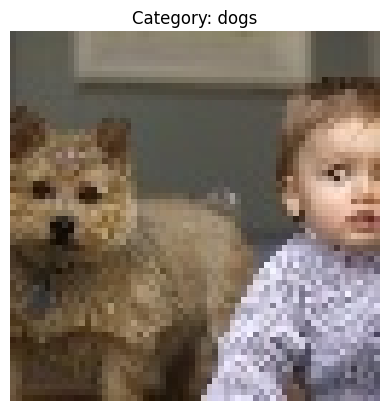

In [5]:
# printing three images from each of the category that is present in the dataset
num_samples_per_category = 3
for category_sn in os.listdir(dataset_folder):
    categorypath_sn = os.path.join(dataset_folder, category_sn)
    if os.path.isdir(categorypath_sn):
        for i, imagefile_sn in enumerate(os.listdir(categorypath_sn)):
            if i >= num_samples_per_category:
                break
            imagepath_sn = os.path.join(categorypath_sn, imagefile_sn)
            # Reading the image
            image_sn = cv2.imread(imagepath_sn)
            if image_sn is not None:
                # Displaying the sample image
                plt.imshow(cv2.cvtColor(image_sn, cv2.COLOR_BGR2RGB))
                plt.title(f"Category: {category_sn}")
                plt.axis('off')
                plt.show()

In [6]:
data_sn = []
labels_sn = []

In [7]:
#preprocessing the images by normalzing the pixel values of the images
for category_sn in os.listdir(dataset_folder):
    category_path_sn = os.path.join(dataset_folder, category_sn)
    if os.path.isdir(category_path_sn):
        for image_file_sn in os.listdir(category_path_sn):
            image_path_sn = os.path.join(category_path_sn, image_file_sn)
            image_sn = cv2.imread(image_path_sn)
            if image_sn is not None:
                image_sn = tf.cast(image_sn, tf.float32)
                mean = [0.485, 0.456, 0.406]
                std = [0.229, 0.224, 0.225]
                image_sn = (image_sn - mean) / std
                data_sn.append(image_sn) #adding images
                labels_sn.append(category_sn)#adding corresponding labels

In [8]:
# Converting data and labels to the Numpy arrays
data_sn = np.array(data_sn)
labels_sn = np.array(labels_sn)

In [9]:
# Converting the labels to the categorical values
label_encoder_sn = LabelEncoder()
encoded_labels_sn = label_encoder_sn.fit_transform(labels_sn)
categorical_labels_sn = to_categorical(encoded_labels_sn)

<ipython-input-10-ae2d020485ef>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=class_labels, palette='Set3')
<ipython-input-10-ae2d020485ef>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=encoded_labels_sn, palette='Set3')


<Figure size 1200x500 with 0 Axes>

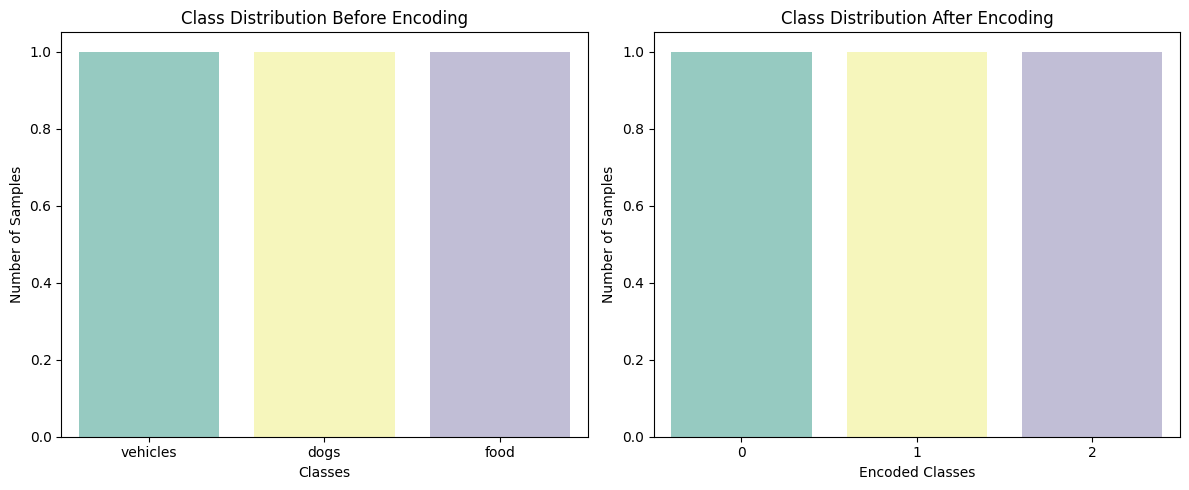

In [10]:

plt.figure(figsize=(12, 5))

plt.figure(figsize=(12, 5))

# Before encoding
plt.subplot(1, 2, 1)
sns.countplot(x=class_labels, palette='Set3')
plt.title('Class Distribution Before Encoding')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')

# After encoding
label_encoder_sn = LabelEncoder()
encoded_labels_sn = label_encoder_sn.fit_transform(class_labels)
plt.subplot(1, 2, 2)
sns.countplot(x=encoded_labels_sn, palette='Set3')
plt.title('Class Distribution After Encoding')
plt.xlabel('Encoded Classes')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()


In [11]:
# Splitting the dataset into training, testing, and validation sets
train_data_sn, test_data_sn, train_labels_sn, test_labels_sn = train_test_split(data_sn, categorical_labels_sn, test_size=0.2, random_state=42)
train_data_sn, val_data_sn, train_labels_sn, val_labels_sn = train_test_split(train_data_sn, train_labels_sn, test_size=0.1, random_state=42)

In [12]:
# Getting the shape of the images
print("Train data shape:", train_data_sn.shape)
print("Train labels shape:", train_labels_sn.shape)
print("Validation data shape:", val_data_sn.shape)
print("Validation labels shape:", val_labels_sn.shape)
print("Test data shape:", test_data_sn.shape)
print("Test labels shape:", test_labels_sn.shape)

Train data shape: (21600, 64, 64, 3)
Train labels shape: (21600, 3)
Validation data shape: (2400, 64, 64, 3)
Validation labels shape: (2400, 3)
Test data shape: (6000, 64, 64, 3)
Test labels shape: (6000, 3)


In [13]:
def VGG_13_sn(input_shape=(64, 64, 3), num_classes=3):
    model_sn = models.Sequential()

    # Block 1
    model_sn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model_sn.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model_sn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model_sn.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model_sn.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model_sn.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model_sn.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flattening and adding the dense layers
    model_sn.add(layers.Flatten())
    model_sn.add(layers.Dense(4096, activation='relu'))
    model_sn.add(layers.Dense(4096, activation='relu'))
    model_sn.add(layers.Dense(num_classes, activation='softmax'))

    return model_sn

In [14]:
input_shape_sn = (64, 64, 3)
num_classes_sn = 3

In [15]:
model_sn = VGG_13_sn(input_shape=(64, 64, 3), num_classes=3)

# Compiling the model
model_sn.compile(optimizer=Adagrad(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Displaying the summary of the vgg cnn model
model_sn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                   

In [16]:
epochs_sn = 5
history_sn = model_sn.fit(
    train_data_sn, train_labels_sn,
    epochs=epochs_sn,
    validation_data=(val_data_sn, val_labels_sn)
)

# Evaluate the model on the test set
test_loss_sn, test_accuracy_sn = model_sn.evaluate(test_data_sn, test_labels_sn)
print(f'Test accuracy: {test_accuracy_sn * 100:.2f}%')

Epoch 1/5
675/675 [==============================] - 47s 57ms/step - loss: 0.6160 - accuracy: 0.7392 - val_loss: 0.4439 - val_accuracy: 0.8213
Epoch 2/5
675/675 [==============================] - 39s 58ms/step - loss: 0.4407 - accuracy: 0.8231 - val_loss: 0.3636 - val_accuracy: 0.8567
Epoch 3/5
675/675 [==============================] - 39s 57ms/step - loss: 0.3621 - accuracy: 0.8613 - val_loss: 0.3283 - val_accuracy: 0.8767
Epoch 4/5
675/675 [==============================] - 39s 57ms/step - loss: 0.3166 - accuracy: 0.8805 - val_loss: 0.2739 - val_accuracy: 0.8950
Epoch 5/5
188/188 [==============================] - 4s 21ms/step - loss: 0.2960 - accuracy: 0.8850
Test accuracy: 88.50%


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Get predictions on the test set
y_pred_sn = model_sn.predict(test_data_sn)
y_pred_sn_classes = np.argmax(y_pred_sn, axis=1)

# Convert one-hot encoded labels to single-label format
test_labels_sn_single = np.argmax(test_labels_sn, axis=1)

# Calculate precision, recall, and confusion matrix
precision_sn = precision_score(test_labels_sn_single, y_pred_sn_classes, average='weighted')
recall_sn = recall_score(test_labels_sn_single, y_pred_sn_classes, average='weighted')
conf_matrix_sn = confusion_matrix(test_labels_sn_single, y_pred_sn_classes)

# Print the evaluation metrics
print(f'Precision: {precision_sn:.4f}')
print(f'Recall: {recall_sn:.4f}')
print('')
print(f'Confusion Matrix:\n{conf_matrix_sn}')
print('')
print(f'Classification Report:\n{classification_report(test_labels_sn_single, y_pred_sn_classes)}')


188/188 [==============================] - 3s 15ms/step
Precision: 0.8896
Recall: 0.8850

Confusion Matrix:
[[1612  327   63]
 [  84 1847   65]
 [  62   89 1851]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2002
           1       0.82      0.93      0.87      1996
           2       0.94      0.92      0.93      2002

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.88      6000
weighted avg       0.89      0.89      0.88      6000



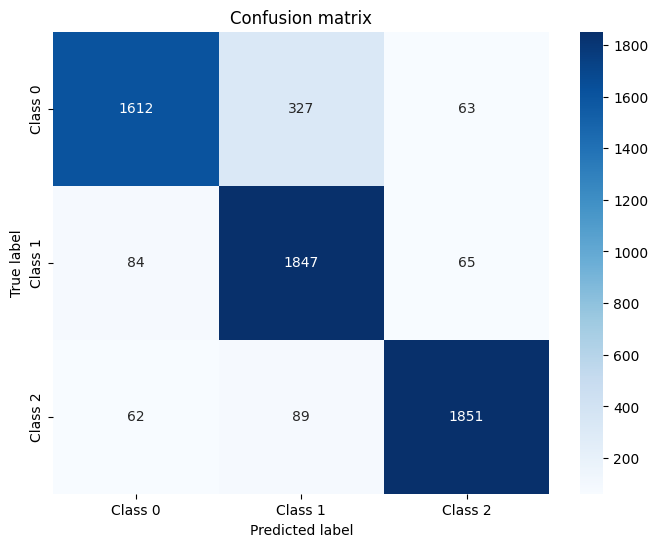

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
class_labels = ['Class 0', 'Class 1', 'Class 2']
sns.heatmap(conf_matrix_sn, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


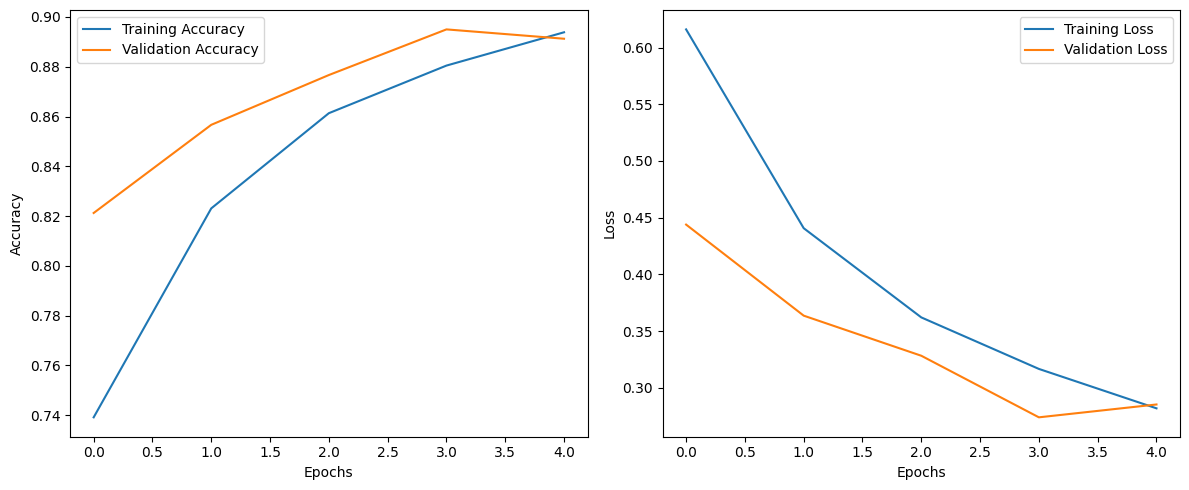

In [19]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sn.history['accuracy'], label='Training Accuracy')
plt.plot(history_sn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss over time
plt.subplot(1, 2, 2)
plt.plot(history_sn.history['loss'], label='Training Loss')
plt.plot(history_sn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Adding Regularization, early stopping, dropout
 to the VGG 13

In [32]:
from tensorflow.keras.regularizers import l2

def VGG_13_sn_rd(input_shape=(64, 64, 3), num_classes=3, dropout_rate=0.5, weight_decay=1e-4):
    model_sn_rd = models.Sequential()

    # Block 1
    model_sn_rd.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape,
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model_sn_rd.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model_sn_rd.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model_sn_rd.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model_sn_rd.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same',
                               kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flattening and adding the dense layers with dropout
    model_sn_rd.add(layers.Flatten())
    model_sn_rd.add(layers.Dense(4096, activation='relu', kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Dropout(dropout_rate))
    model_sn_rd.add(layers.Dense(4096, activation='relu', kernel_regularizer=l2(weight_decay)))
    model_sn_rd.add(layers.Dropout(dropout_rate))
    model_sn_rd.add(layers.Dense(num_classes, activation='softmax'))

    return model_sn_rd


In [33]:
model_sn_rd = VGG_13_sn_rd(input_shape=(64, 64, 3), num_classes=3, dropout_rate=0.2, weight_decay=1e-4)

# Compiling the model
model_sn_rd.compile(optimizer=Adagrad(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Displaying the summary of the vgg cnn model
model_sn_rd.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_53 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_54 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_55 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                

In [34]:
epochs_sn_rd = 5
history_sn_rd = model_sn_rd.fit(
    train_data_sn, train_labels_sn,
    epochs=epochs_sn_rd,
    validation_data=(val_data_sn, val_labels_sn)
)

# Evaluate the model on the test set
test_loss_sn_rd, test_accuracy_sn_rd = model_sn_rd.evaluate(test_data_sn, test_labels_sn)
print(f'Test accuracy: {test_accuracy_sn_rd * 100:.2f}%')

Epoch 1/5
675/675 [==============================] - 45s 63ms/step - loss: 1.7164 - accuracy: 0.7228 - val_loss: 1.5397 - val_accuracy: 0.8079
Epoch 2/5
675/675 [==============================] - 41s 61ms/step - loss: 1.5209 - accuracy: 0.8186 - val_loss: 1.4476 - val_accuracy: 0.8662
Epoch 3/5
675/675 [==============================] - 42s 62ms/step - loss: 1.4525 - accuracy: 0.8503 - val_loss: 1.3786 - val_accuracy: 0.8825
Epoch 4/5
675/675 [==============================] - 41s 61ms/step - loss: 1.3999 - accuracy: 0.8742 - val_loss: 1.3492 - val_accuracy: 0.8963
Epoch 5/5
188/188 [==============================] - 3s 16ms/step - loss: 1.3567 - accuracy: 0.8917
Test accuracy: 89.17%


In [35]:
# Get predictions on the test set
y_pred_sn_rd = model_sn_rd.predict(test_data_sn)
y_pred_sn_classes_rd = np.argmax(y_pred_sn_rd, axis=1)

# Convert one-hot encoded labels to single-label format
test_labels_sn_single_rd = np.argmax(test_labels_sn, axis=1)

# Calculate precision, recall, and confusion matrix
precision_sn_rd = precision_score(test_labels_sn_single_rd, y_pred_sn_classes_rd, average='weighted')
recall_sn_rd = recall_score(test_labels_sn_single_rd, y_pred_sn_classes_rd, average='weighted')
conf_matrix_sn_rd = confusion_matrix(test_labels_sn_single_rd, y_pred_sn_classes_rd)

# Print the evaluation metrics
print(f'Precision: {precision_sn_rd:.4f}')
print(f'Recall: {recall_sn_rd:.4f}')
print('')
print(f'Confusion Matrix:\n{conf_matrix_sn_rd}')
print('')
print(f'Classification Report:\n{classification_report(test_labels_sn_single_rd, y_pred_sn_classes_rd)}')


188/188 [==============================] - 3s 15ms/step
Precision: 0.8930
Recall: 0.8917

Confusion Matrix:
[[1767  198   37]
 [ 161 1774   61]
 [ 114   79 1809]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2002
           1       0.86      0.89      0.88      1996
           2       0.95      0.90      0.93      2002

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



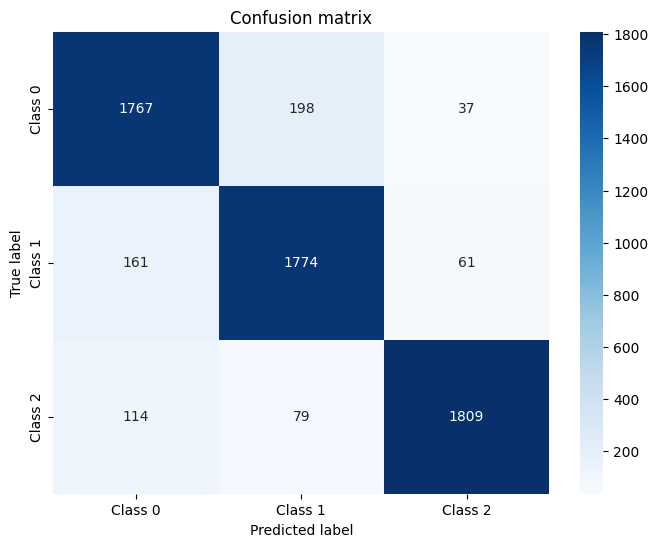

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
class_labels = ['Class 0', 'Class 1', 'Class 2']
sns.heatmap(conf_matrix_sn_rd, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion matrix")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


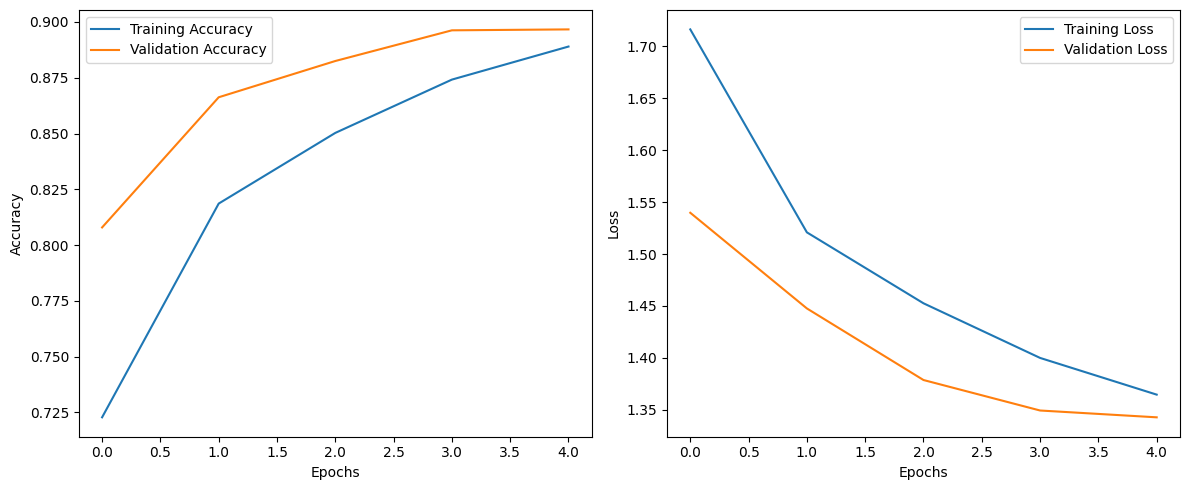

In [37]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sn_rd.history['accuracy'], label='Training Accuracy')
plt.plot(history_sn_rd.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss over time
plt.subplot(1, 2, 2)
plt.plot(history_sn_rd.history['loss'], label='Training Loss')
plt.plot(history_sn_rd.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [38]:
from tensorflow.keras.models import save_model
save_model(model_sn, 'model_sn.h5')

<ipython-input-38-45b5d00dba0b>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_sn, 'model_sn.h5')
